[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaloADBA/ELE8812-demos/blob/main/Demos/Lesson%207/Leçon_7_Demo_hough.ipynb)

# ELE8812 - Segmentation

## Démo :  Transformée de Hough

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from skimage.feature import canny
import math
from skimage.transform import hough_line, hough_line_peaks
import cv2
from PIL import Image
!pip install matplotlib --upgrade

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (25,10)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [ ]:
!git clone https://github.com/MaloADBA/ELE8812-demos.git Repo

In [72]:
Npics = 2

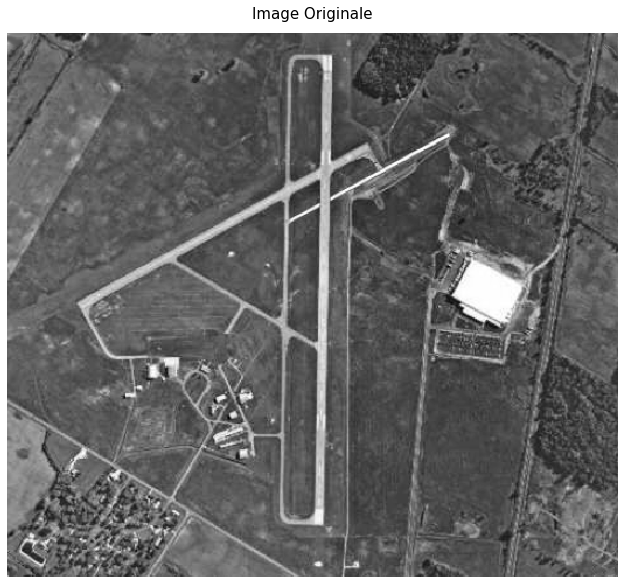

In [73]:
im = plt.imread('Repo/Data/Fig1034a.tif')
plt.imshow(im, cmap='gray'); plt.title('Image Originale'); plt.axis('off'); plt.show();

## Sigma = 2

In [74]:
sigma = 2

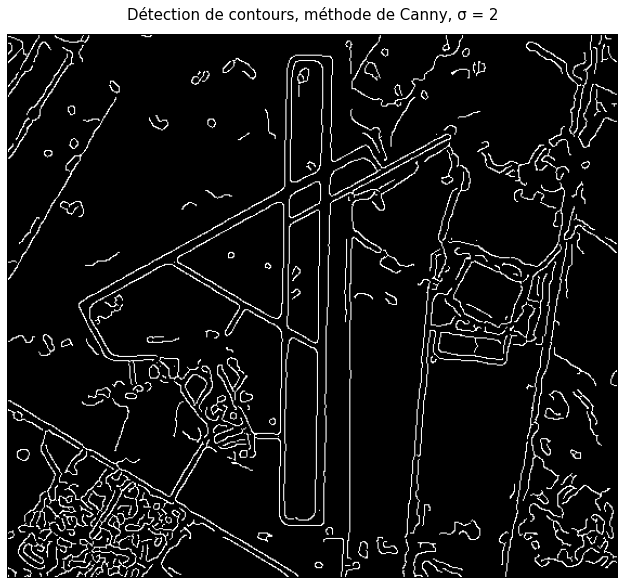

In [75]:
# Canny detection :
# BW = binary image of contour 
BW = canny(im, sigma=sigma, low_threshold=None, high_threshold=None)
plt.imshow(BW, cmap='gray'); plt.title('Détection de contours, méthode de Canny, \u03C3 = '+str(sigma)); plt.axis('off'); plt.show();

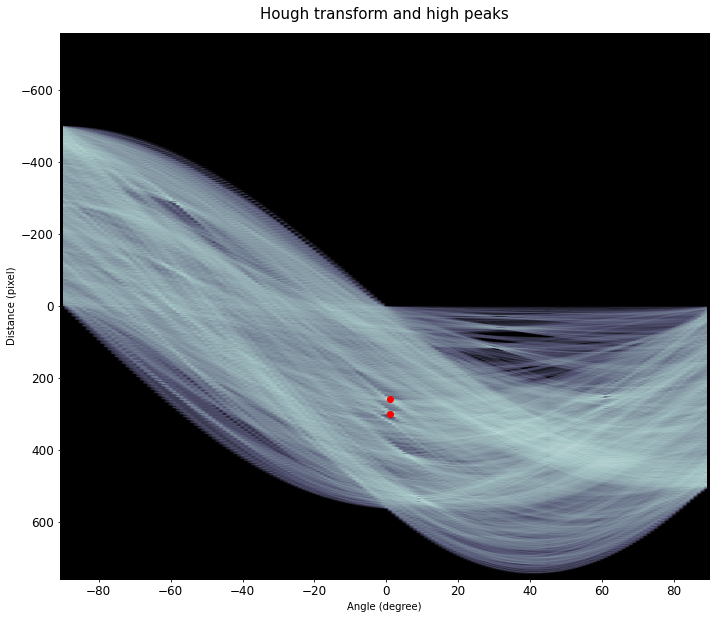

In [76]:
# h : hough transofrm matrix
# theta: theta
# d : rho
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 180, endpoint=False)
h, theta, d = hough_line(BW, theta=tested_angles)

# Find peaks in Hough transform
bestH, bestTheta, bestD = hough_line_peaks(h, theta, d, num_peaks=Npics, threshold=np.ceil(0.3*np.max(h)).astype(int))
angle = bestTheta * (180/np.pi)

# plot hough 
angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
plt.imshow(np.log(1+h)[:,:], extent=bounds, cmap=plt.cm.bone, aspect=1/10)
# plot peaks
plt.plot(angle,bestD, "or")
plt.title('Hough transform and high peaks', fontsize=15)
plt.xlabel('Angle (degree)')
plt.ylabel('Distance (pixel)')
plt.show()

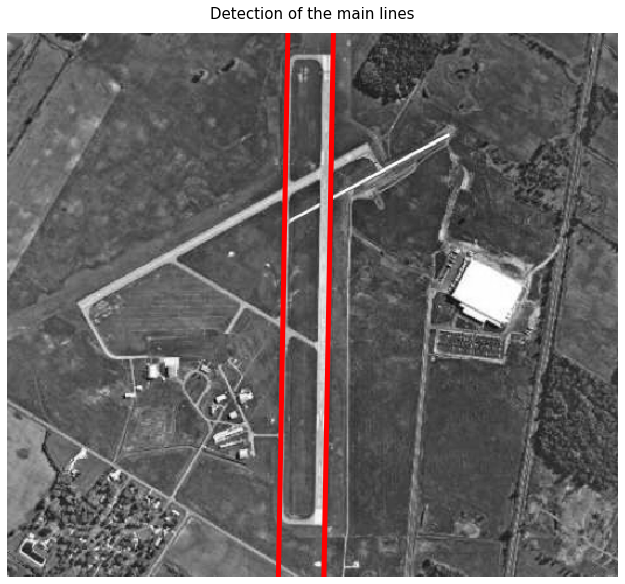

In [77]:
# Plot lines corresponding to high peaks
plt.imshow(im, cmap='gray')

position = []
slope = []

for _, angle, dist in zip(*hough_line_peaks(h, theta, d, num_peaks=Npics, threshold=np.ceil(0.3*np.max(h)).astype(int))):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    position.append((x0,y0))
    slope.append(np.tan(angle + np.pi/2))
    plt.axline((x0, y0), slope=np.tan(angle + np.pi/2),lw=5,c='r')
    plt.axis('off')
plt.title("Detection of the main lines")
plt.show()

## Sigma = 4

In [78]:
sigma=4

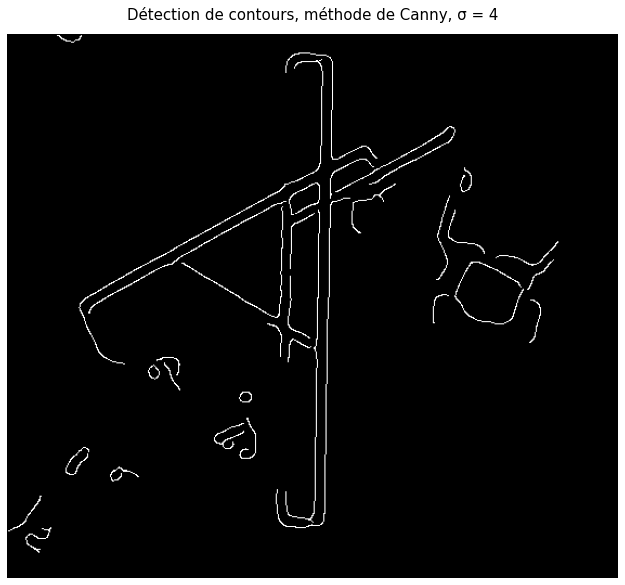

In [79]:
# Canny detection :
# BW = binary image of contour 
BW = canny(im, sigma=sigma, low_threshold=None, high_threshold=None)
plt.imshow(BW, cmap='gray'); plt.title('Détection de contours, méthode de Canny, \u03C3 = '+str(sigma)); plt.axis('off'); plt.show();

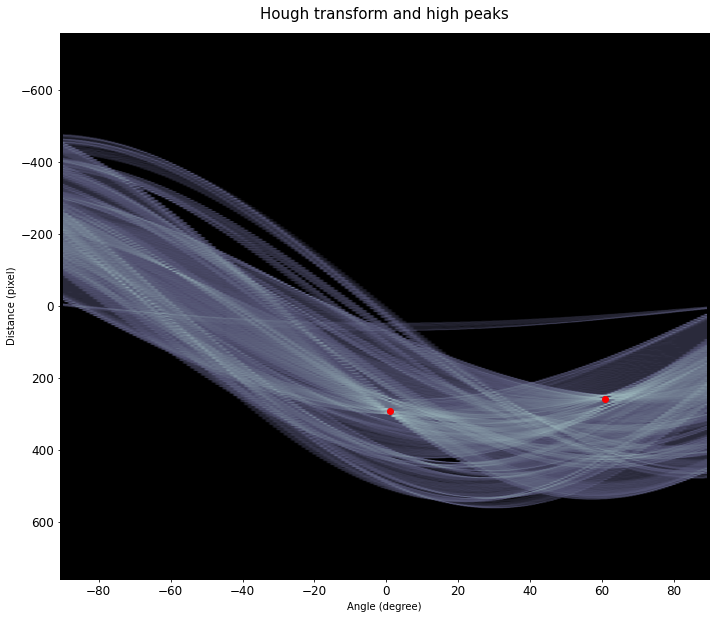

In [80]:
# h : hough transofrm matrix
# theta: theta
# d : rho
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 180, endpoint=False)
h, theta, d = hough_line(BW, theta=tested_angles)

# Find peaks in Hough transform
bestH, bestTheta, bestD = hough_line_peaks(h, theta, d, num_peaks=Npics, threshold=np.ceil(0.3*np.max(h)).astype(int))
angle = bestTheta * (180/np.pi)

# plot hough 
angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
plt.imshow(np.log(1+h)[:,:], extent=bounds, cmap=plt.cm.bone, aspect=1/10)
# plot peaks
plt.plot(angle,bestD, "or")
plt.title('Hough transform and high peaks', fontsize=15)
plt.xlabel('Angle (degree)')
plt.ylabel('Distance (pixel)')
plt.show()

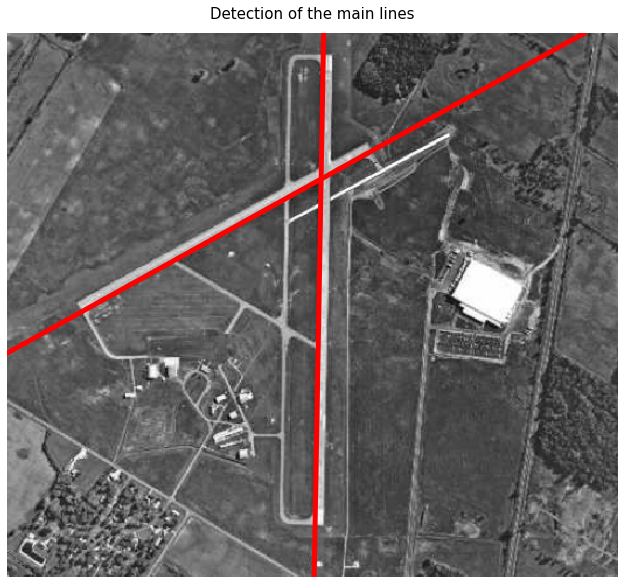

In [81]:
# Plot lines corresponding to high peaks
plt.imshow(im, cmap='gray')

position = []
slope = []

for _, angle, dist in zip(*hough_line_peaks(h, theta, d, num_peaks=Npics, threshold=np.ceil(0.3*np.max(h)).astype(int))):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    position.append((x0,y0))
    slope.append(np.tan(angle + np.pi/2))
    plt.axline((x0, y0), slope=np.tan(angle + np.pi/2),lw=5,c='r')
    plt.axis('off')
plt.title("Detection of the main lines")
plt.show()